In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# 1º TRIMESTRE 2018 y 2019

In [2]:
# Cargar los dataset dataset
Q12018 = pd.read_csv('CUSQ118CLEAN.csv')
Q12019 = pd.read_csv('CUSQ119CLEAN.csv')
# Fusionar los datasets por columnas comunes
Q1 = pd.concat([Q12018, Q12019])

In [3]:
Q1.head()

,tripduration,from_station_name,to_station_name,usertype,gender,start_day,start_month,start_year,Age_range
0,1481.0,Lake Shore Dr & Ohio St,Lake Shore Dr & Ohio St,Customer,Male,1,1,2018,30-50
1,1361.0,Lake Shore Dr & Ohio St,Lake Shore Dr & Ohio St,Customer,Male,1,1,2018,30-50
2,3133.0,Mies van der Rohe Way & Chicago Ave,Shedd Aquarium,Customer,Male,1,1,2018,30-50
3,3158.0,Mies van der Rohe Way & Chicago Ave,Shedd Aquarium,Customer,Male,1,1,2018,30-50
4,2958.0,Mies van der Rohe Way & Chicago Ave,Shedd Aquarium,Customer,Male,1,1,2018,30-50


In [4]:
Q1.shape

(45088, 9)

In [5]:
# Desactivar la notación científica
pd.set_option('display.float_format', '{:.2f}'.format)
Q1.describe()

,tripduration,start_day,start_month,start_year
count,45088.00,45088.00,45088.00,45088.00
mean,1930.67,18.23,2.51,2018.51
std,1680.02,8.65,0.78,0.50
min,61.00,1.00,1.00,2018.00
25%,877.00,11.00,2.00,2018.00
50%,1442.50,18.00,3.00,2019.00
75%,2326.00,26.00,3.00,2019.00
max,12407.00,31.00,3.00,2019.00


Trabajo con la edad

In [6]:
# Calcular la suma de cada rango de edad
rang_anoC = Q1.groupby(['Age_range','start_year']).size().reset_index(name='count')
rang_anoC

,Age_range,start_year,count
0,18-29,2018,15
1,18-29,2019,3577
2,30-50,2018,22200
3,30-50,2019,19085
4,50-65,2018,10
5,50-65,2019,201


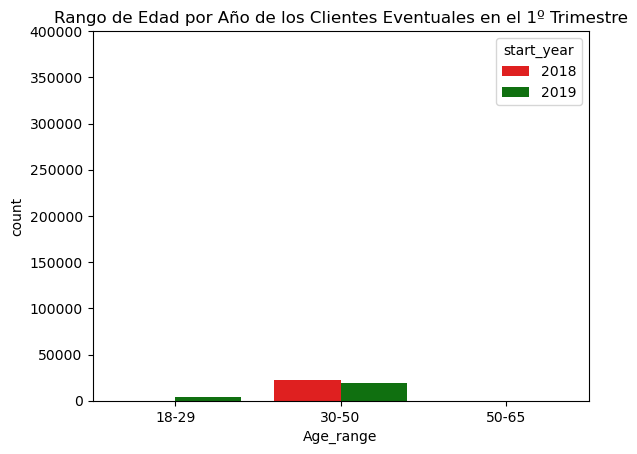

In [7]:
# Crear el gráfico de barras utilizando Seaborn
sns.barplot(x='Age_range', y='count', hue='start_year', data=rang_anoC, palette=['red', 'green'])
# Configurar el título del gráfico
plt.title('Rango de Edad por Año de los Clientes Eventuales en el 1º Trimestre')

# Establecer límites del eje y del gráfico 
plt.ylim(0, 400000)

# Mostrar el gráfico
plt.show()

Trabajar con Tripduration

In [8]:
# Calcular la media de la columna 'tripduration' por rango de edad y año
tripC = Q1.groupby(['Age_range', 'start_year'])['tripduration'].mean().reset_index(name='mean_tripduration')
tripC

,Age_range,start_year,mean_tripduration
0,18-29,2018,1362.47
1,18-29,2019,1768.84
2,30-50,2018,1984.29
3,30-50,2019,1896.68
4,50-65,2018,1062.60
5,50-65,2019,2202.04


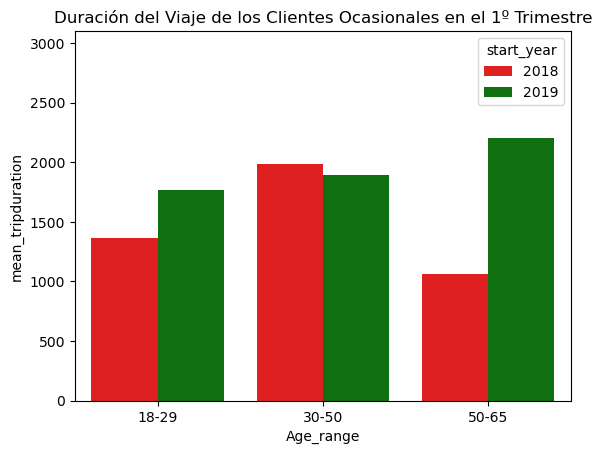

In [9]:
# Crear el gráfico de barras utilizando Seaborn
sns.barplot(x='Age_range', y='mean_tripduration', hue='start_year', data=tripC, palette=['red', 'green'])

# Configurar el título del gráfico
plt.title('Duración del Viaje de los Clientes Ocasionales en el 1º Trimestre')

# Establecer límites del eje y del gráfico 
plt.ylim(0, 3100)

# Mostrar el gráfico
plt.show()

Trabajar con gender

In [10]:
# Calcular la suma de cada rango de edad
gend_anoc = Q1.groupby(['gender','start_year']).size().reset_index(name='count')
gend_anoc

,gender,start_year,count
0,Female,2018,19
1,Female,2019,1856
2,Male,2018,22206
3,Male,2019,21007


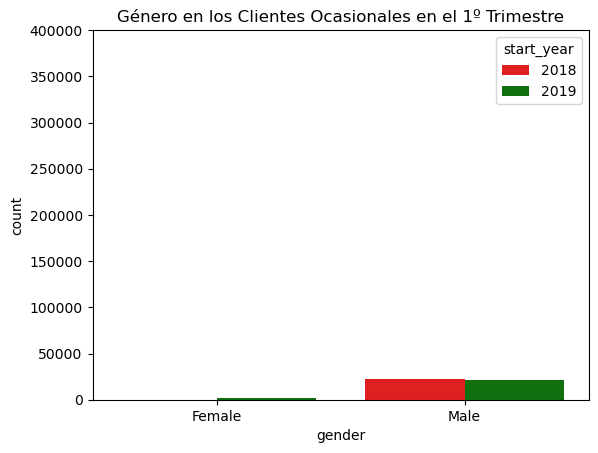

In [11]:
# Crear el gráfico de barras utilizando Seaborn
sns.barplot(x='gender', y='count', hue='start_year', data=gend_anoc, palette=['red', 'green'] )

# Establecer el título del gráfico
plt.title('Género en los Clientes Ocasionales en el 1º Trimestre')
# Establecer límites del eje y del gráfico 
plt.ylim(0, 400000)

# Mostrar el gráfico
plt.show()

DIA DE INICIO POR AÑO Y MES

In [12]:
# Calcular la media de la columna 'Edad' agrupada por 'Start Year'
moda_por_dayC = Q1.groupby(['start_year','start_month'])['start_day'].apply(lambda x: x.mode()).reset_index(name='dia_frecuente')
moda_por_dayC = moda_por_dayC.drop(columns='level_2')
moda_por_dayC

,start_year,start_month,dia_frecuente
0,2018,1,27
1,2018,2,27
2,2018,3,18
3,2019,1,5
4,2019,2,22
5,2019,3,23


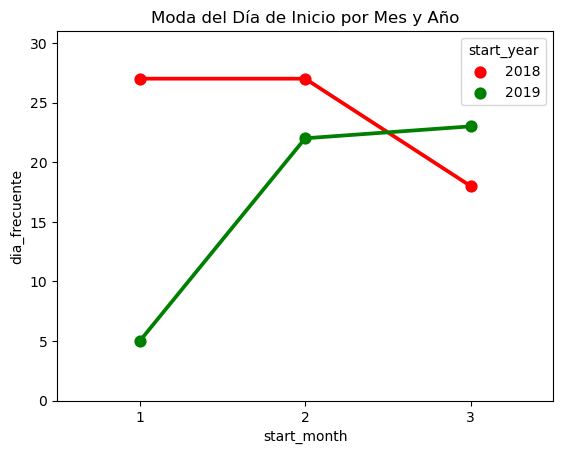

In [13]:
# Crear el gráfico de barras utilizando Seaborn
sns.pointplot(x='start_month', y='dia_frecuente', hue='start_year', data=moda_por_dayC, palette=['red', 'green'] )

# Configurar el título del gráfico
plt.title('Moda del Día de Inicio por Mes y Año')

# Establecer el rango del eje y desde 0 hasta 30
plt.ylim(0, 31)

# Mostrar el gráfico
plt.show()

ESTACIONES MEJORES DE INICIO

In [14]:
# Contar las repeticiones de valores en la columna 'from_station_name', para saber las mejores estaciones
mejores_estaciones1C = Q1['from_station_name'].value_counts().head(5)
mejores_estaciones1C

Streeter Dr & Grand Ave      2742
Lake Shore Dr & Monroe St    2607
Shedd Aquarium               2077
Millennium Park              1311
Adler Planetarium             935
Name: from_station_name, dtype: int64

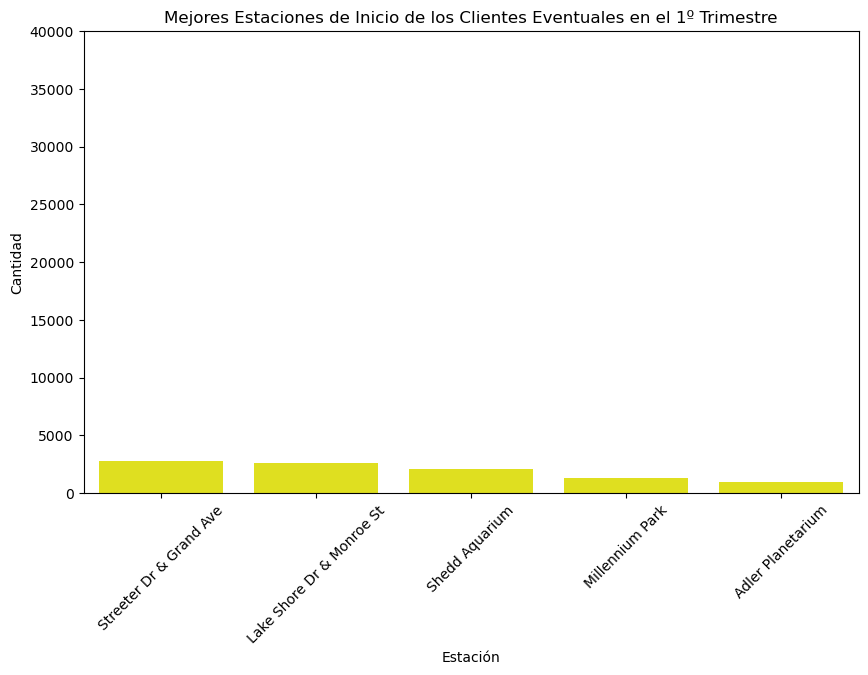

In [15]:
# Crear el gráfico de barras
plt.figure(figsize=(10, 6))
sns.barplot(x=mejores_estaciones1C.index, y=mejores_estaciones1C.values, color='yellow')
plt.xlabel('Estación')
plt.ylabel('Cantidad')
plt.title('Mejores Estaciones de Inicio de los Clientes Eventuales en el 1º Trimestre')
# Establecer límites del eje y del gráfico 
plt.ylim(0, 40000)
plt.xticks(rotation=45)

# Mostrar el gráfico
plt.show()

In [16]:
# Contar las repeticiones de valores en la columna 'to_station_name', para saber las mejores estaciones
mejores_estaciones_finalc = Q1['to_station_name'].value_counts().head(5)
mejores_estaciones_finalc

Streeter Dr & Grand Ave      4121
Millennium Park              1875
Lake Shore Dr & Monroe St    1833
Shedd Aquarium               1526
Michigan Ave & Oak St         937
Name: to_station_name, dtype: int64

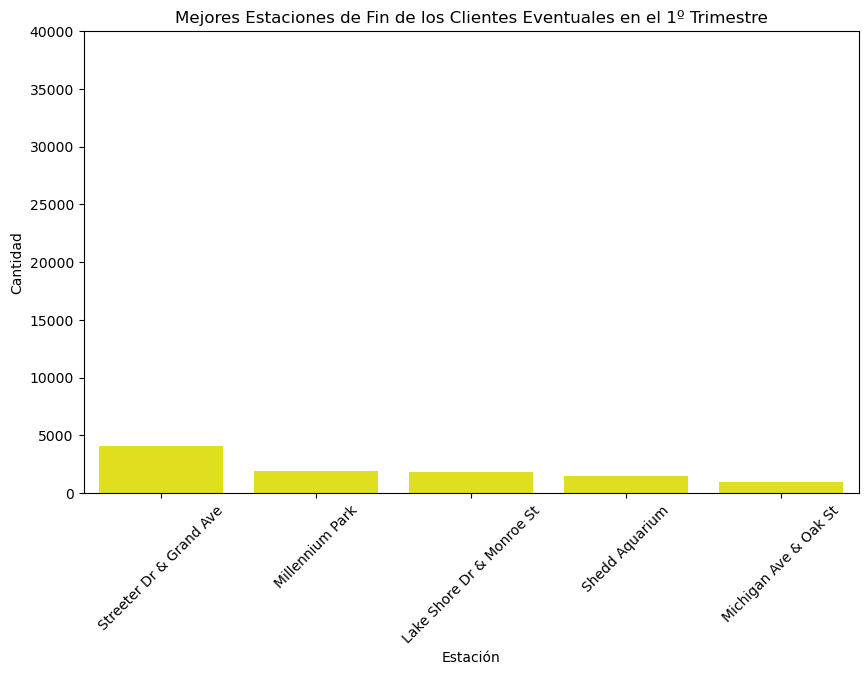

In [17]:
# Crear el gráfico de barras
plt.figure(figsize=(10, 6))
sns.barplot(x=mejores_estaciones_finalc.index, y=mejores_estaciones_finalc.values, color='yellow')
plt.xlabel('Estación')
plt.ylabel('Cantidad')
plt.title('Mejores Estaciones de Fin de los Clientes Eventuales en el 1º Trimestre')
# Establecer límites del eje y del gráfico 
plt.ylim(0, 40000)
plt.xticks(rotation=45)

# Mostrar el gráfico
plt.show()

Se encuentran todas las estaciones alrededor del Grant Park 

RELACIONAR ESTACION DE INICIO Y FINAL.

In [18]:
# Encontrar los viajes que coinciden en inicio y fin de recorrido
viajes_coincidentes = Q1[Q1['from_station_name'] == Q1['to_station_name']]
viajes_coincidentes

,tripduration,from_station_name,to_station_name,usertype,gender,start_day,start_month,start_year,Age_range
0,1481.00,Lake Shore Dr & Ohio St,Lake Shore Dr & Ohio St,Customer,Male,1,1,2018,30-50
1,1361.00,Lake Shore Dr & Ohio St,Lake Shore Dr & Ohio St,Customer,Male,1,1,2018,30-50
14,1801.00,Evans Ave & 75th St,Evans Ave & 75th St,Customer,Male,1,1,2018,30-50
20,369.00,Evans Ave & 75th St,Evans Ave & 75th St,Customer,Male,2,1,2018,30-50
32,1500.00,Valli Produce - Evanston Plaza,Valli Produce - Evanston Plaza,Customer,Male,3,1,2018,30-50
...,...,...,...,...,...,...,...,...,...
22828,1390.00,Lake Shore Dr & North Blvd,Lake Shore Dr & North Blvd,Customer,Male,31,3,2019,30-50
22829,1366.00,Lake Shore Dr & North Blvd,Lake Shore Dr & North Blvd,Customer,Male,31,3,2019,30-50
22847,1496.00,Wabash Ave & Grand Ave,Wabash Ave & Grand Ave,Customer,Male,31,3,2019,30-50
22848,1463.00,Wabash Ave & Grand Ave,Wabash Ave & Grand Ave,Customer,Male,31,3,2019,30-50


In [19]:
# Calcular la suma de los recorridos coincidentes por estación
suma_recorridos = viajes_coincidentes.shape[0]
suma_recorridos

5833

In [20]:
#proporcion de viajes coincidentes
proporcion_viajes_iguales = suma_recorridos / len(Q1) * 100 
proporcion_viajes_iguales

12.936923349893542

SABER CUANTOS DE ESTOS VIAJES QUE COINCIDEN SON DE LAS MEJORES ESTACIONES

In [21]:
#estaciones mejores
estaciones1=['Streeter Dr & Grand Ave','Lake Shore Dr & Monroe St','Shedd Aquarium','Millennium Park','Adler Planetarium']

In [22]:
# Filtrar los viajes coincidentes con las mejores estaciones
viajesft = Q1[Q1['from_station_name'].isin(estaciones1) & Q1['to_station_name'].isin(estaciones1) & (Q1['from_station_name'] == Q1['to_station_name'])]
viajesft

,tripduration,from_station_name,to_station_name,usertype,gender,start_day,start_month,start_year,Age_range
86,2342.00,Lake Shore Dr & Monroe St,Lake Shore Dr & Monroe St,Customer,Male,5,1,2018,30-50
87,2326.00,Lake Shore Dr & Monroe St,Lake Shore Dr & Monroe St,Customer,Male,5,1,2018,30-50
161,3189.00,Streeter Dr & Grand Ave,Streeter Dr & Grand Ave,Customer,Male,7,1,2018,30-50
162,3098.00,Streeter Dr & Grand Ave,Streeter Dr & Grand Ave,Customer,Male,7,1,2018,30-50
163,2945.00,Streeter Dr & Grand Ave,Streeter Dr & Grand Ave,Customer,Male,7,1,2018,30-50
...,...,...,...,...,...,...,...,...,...
22815,1930.00,Streeter Dr & Grand Ave,Streeter Dr & Grand Ave,Customer,Male,31,3,2019,30-50
22817,1956.00,Streeter Dr & Grand Ave,Streeter Dr & Grand Ave,Customer,Male,31,3,2019,30-50
22818,1919.00,Streeter Dr & Grand Ave,Streeter Dr & Grand Ave,Customer,Male,31,3,2019,30-50
22820,1812.00,Streeter Dr & Grand Ave,Streeter Dr & Grand Ave,Customer,Male,31,3,2019,30-50


In [23]:
sum_viajesft = viajesft['from_station_name'].value_counts().sum()
sum_viajesft

1548

In [24]:
# Calcular el porcentaje de viajes coincidentes con las mejores estaciones
porcentaje_coincidentes = (sum_viajesft / suma_recorridos) * 100
porcentaje_coincidentes

26.538659351962966

# 2º TRIMESTRE 2018 y 2019

In [25]:
# Cargar los dataset dataset
Q22018 = pd.read_csv('CUSQ218CLEAN.csv')
Q22019 = pd.read_csv('CUSQ219CLEAN.csv')
# Fusionar los datasets por columnas comunes
Q2 = pd.concat([Q22018, Q22019])

In [26]:
Q2.head()

,tripduration,from_station_name,to_station_name,usertype,gender,start_day,start_month,start_year,Age_range
0,960.00,State St & Pearson St,State St & Pearson St,Customer,Male,1,4,2018,30-50
1,1958.00,Racine Ave & 18th St,Cityfront Plaza Dr & Pioneer Ct,Customer,Male,1,4,2018,30-50
2,362.00,Clark St & Elm St,Clark St & Chicago Ave,Customer,Male,1,4,2018,30-50
3,730.00,State St & Kinzie St,Michigan Ave & 8th St,Customer,Male,1,4,2018,30-50
4,757.00,Damen Ave & Pierce Ave,California Ave & Milwaukee Ave,Customer,Male,1,4,2018,30-50


In [27]:
Q2.shape

(347342, 9)

In [28]:
# Desactivar la notación científica
pd.set_option('display.float_format', '{:.2f}'.format)
Q2.describe()

,tripduration,start_day,start_month,start_year
count,347342.00,347342.00,347342.00,347342.00
mean,1390.61,17.25,5.36,2018.51
std,698.43,9.10,0.72,0.50
min,61.00,1.00,4.00,2018.00
25%,849.00,9.00,5.00,2018.00
50%,1325.00,19.00,6.00,2019.00
75%,1815.00,25.00,6.00,2019.00
max,3419.00,31.00,6.00,2019.00


Trabajo con la edad

In [29]:
# Calcular la suma de cada rango de edad
rang_anoC2 = Q2.groupby(['Age_range','start_year']).size().reset_index(name='count')
rang_anoC2

,Age_range,start_year,count
0,18-29,2018,8873
1,18-29,2019,34075
2,30-50,2018,160730
3,30-50,2019,139730
4,50-65,2018,1329
5,50-65,2019,2605


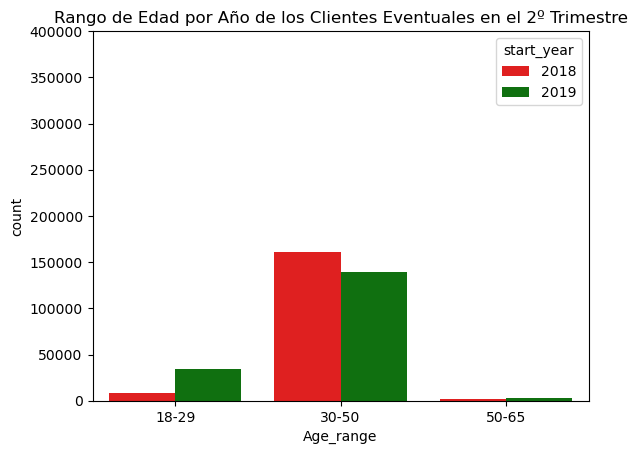

In [30]:
# Crear el gráfico de barras utilizando Seaborn
sns.barplot(x='Age_range', y='count', hue='start_year', data=rang_anoC2, palette=['red', 'green'])
# Configurar el título del gráfico
plt.title('Rango de Edad por Año de los Clientes Eventuales en el 2º Trimestre')

# Establecer límites del eje y del gráfico 
plt.ylim(0, 400000)

# Mostrar el gráfico
plt.show()

Trabajar con Tripduration

In [31]:
# Calcular la media de la columna 'tripduration' por rango de edad y año
tripC2 = Q2.groupby(['Age_range', 'start_year'])['tripduration'].mean().reset_index(name='mean_tripduration')
tripC2

,Age_range,start_year,mean_tripduration
0,18-29,2018,1448.55
1,18-29,2019,1173.51
2,30-50,2018,1547.43
3,30-50,2019,1261.00
4,50-65,2018,1531.20
5,50-65,2019,1238.47


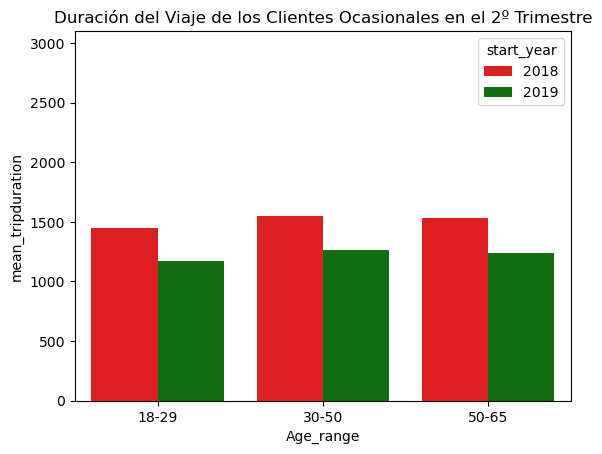

In [32]:
# Crear el gráfico de barras utilizando Seaborn
sns.barplot(x='Age_range', y='mean_tripduration', hue='start_year', data=tripC2, palette=['red', 'green'])

# Configurar el título del gráfico
plt.title('Duración del Viaje de los Clientes Ocasionales en el 2º Trimestre')

# Establecer límites del eje y del gráfico 
plt.ylim(0, 3100)

# Mostrar el gráfico
plt.show()

Trabajar con gender

In [33]:
# Calcular la suma de cada rango de edad
gend_anoc2 = Q2.groupby(['gender','start_year']).size().reset_index(name='count')
gend_anoc2

,gender,start_year,count
0,Female,2018,7705
1,Female,2019,22337
2,Male,2018,163227
3,Male,2019,154073


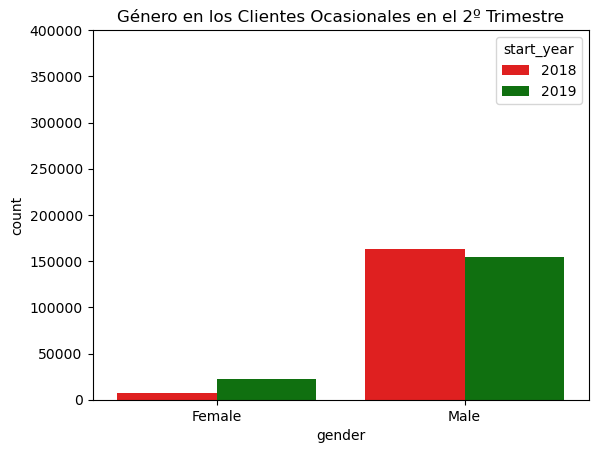

In [34]:
# Crear el gráfico de barras utilizando Seaborn
sns.barplot(x='gender', y='count', hue='start_year', data=gend_anoc2, palette=['red', 'green'] )

# Establecer el título del gráfico
plt.title('Género en los Clientes Ocasionales en el 2º Trimestre')
# Establecer límites del eje y del gráfico 
plt.ylim(0, 400000)

# Mostrar el gráfico
plt.show()

DIA DE INICIO POR AÑO Y MES

In [35]:
# Calcular la media de la columna 'Edad' agrupada por 'Start Year'
moda_por_dayC2 = Q2.groupby(['start_year','start_month'])['start_day'].apply(lambda x: x.mode()).reset_index(name='dia_frecuente')
moda_por_dayC2 = moda_por_dayC2.drop(columns='level_2')
moda_por_dayC2

,start_year,start_month,dia_frecuente
0,2018,4,29
1,2018,5,27
2,2018,6,24
3,2019,4,21
4,2019,5,25
5,2019,6,29


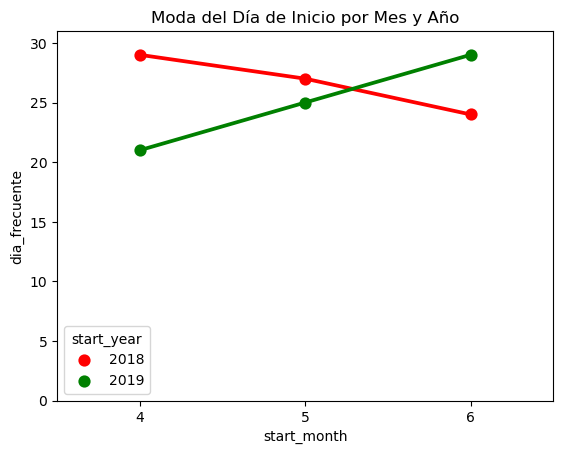

In [36]:
# Crear el gráfico de barras utilizando Seaborn
sns.pointplot(x='start_month', y='dia_frecuente', hue='start_year', data=moda_por_dayC2, palette=['red', 'green'] )

# Configurar el título del gráfico
plt.title('Moda del Día de Inicio por Mes y Año')

# Establecer el rango del eje y desde 0 hasta 30
plt.ylim(0, 31)

# Mostrar el gráfico
plt.show()

ESTACIONES MEJORES DE INICIO

In [37]:
# Contar las repeticiones de valores en la columna 'from_station_name', para saber las mejores estaciones
mejores_estacionesC2 = Q2['from_station_name'].value_counts().head(5)
mejores_estacionesC2

Streeter Dr & Grand Ave       22029
Lake Shore Dr & Monroe St     15786
Shedd Aquarium                10188
Millennium Park                8244
Lake Shore Dr & North Blvd     7744
Name: from_station_name, dtype: int64

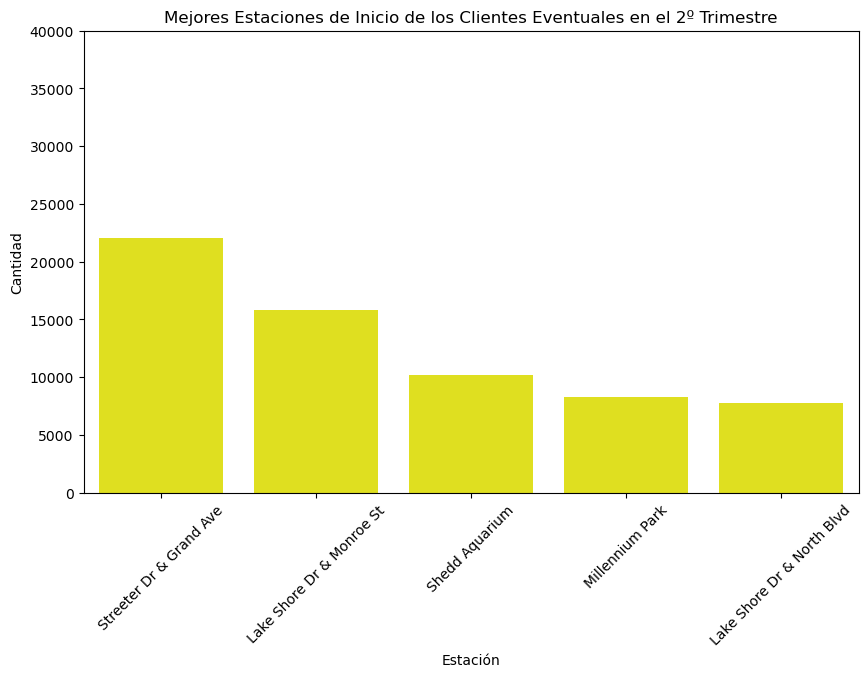

In [38]:
# Crear el gráfico de barras
plt.figure(figsize=(10, 6))
sns.barplot(x=mejores_estacionesC2.index, y=mejores_estacionesC2.values, color='yellow')
plt.xlabel('Estación')
plt.ylabel('Cantidad')
plt.title('Mejores Estaciones de Inicio de los Clientes Eventuales en el 2º Trimestre')
# Establecer límites del eje y del gráfico 
plt.ylim(0, 40000)
plt.xticks(rotation=45)

# Mostrar el gráfico
plt.show()

In [39]:
# Contar las repeticiones de valores en la columna 'to_station_name', para saber las mejores estaciones
mejores_estaciones_finalc2 = Q1['to_station_name'].value_counts().head(5)
mejores_estaciones_finalc2

Streeter Dr & Grand Ave      4121
Millennium Park              1875
Lake Shore Dr & Monroe St    1833
Shedd Aquarium               1526
Michigan Ave & Oak St         937
Name: to_station_name, dtype: int64

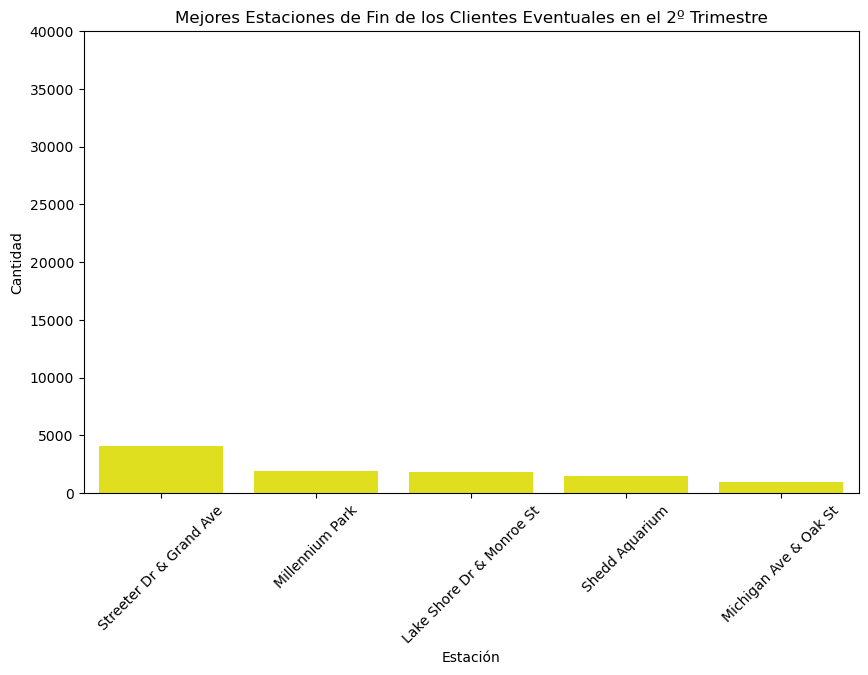

In [40]:
# Crear el gráfico de barras
plt.figure(figsize=(10, 6))
sns.barplot(x=mejores_estaciones_finalc2.index, y=mejores_estaciones_finalc2.values, color='yellow')
plt.xlabel('Estación')
plt.ylabel('Cantidad')
plt.title('Mejores Estaciones de Fin de los Clientes Eventuales en el 2º Trimestre')
# Establecer límites del eje y del gráfico 
plt.ylim(0, 40000)
plt.xticks(rotation=45)

# Mostrar el gráfico
plt.show()

RELACIONAR ESTACION DE INICIO Y FINAL.

In [41]:
# Encontrar los viajes que coinciden en inicio y fin de recorrido
viajes_coincidentes2 = Q2[Q2['from_station_name'] == Q2['to_station_name']]
viajes_coincidentes2

,tripduration,from_station_name,to_station_name,usertype,gender,start_day,start_month,start_year,Age_range
0,960.00,State St & Pearson St,State St & Pearson St,Customer,Male,1,4,2018,30-50
14,450.00,Streeter Dr & Grand Ave,Streeter Dr & Grand Ave,Customer,Male,1,4,2018,30-50
21,123.00,Michigan Ave & Jackson Blvd,Michigan Ave & Jackson Blvd,Customer,Male,1,4,2018,30-50
22,125.00,Michigan Ave & Jackson Blvd,Michigan Ave & Jackson Blvd,Customer,Male,1,4,2018,30-50
23,118.00,Michigan Ave & Jackson Blvd,Michigan Ave & Jackson Blvd,Customer,Male,1,4,2018,30-50
...,...,...,...,...,...,...,...,...,...
176385,1241.00,Streeter Dr & Grand Ave,Streeter Dr & Grand Ave,Customer,Male,30,6,2019,18-29
176388,952.00,Streeter Dr & Grand Ave,Streeter Dr & Grand Ave,Customer,Female,30,6,2019,18-29
176392,1472.00,Campbell Ave & North Ave,Campbell Ave & North Ave,Customer,Female,30,6,2019,18-29
176393,1457.00,Campbell Ave & North Ave,Campbell Ave & North Ave,Customer,Female,30,6,2019,18-29


In [42]:
# Calcular la suma de los recorridos coincidentes por estación
suma_recorridos2 = viajes_coincidentes2.shape[0]
suma_recorridos2

32989

In [43]:
#proporcion de viajes coincidentes
proporcion_viajes_iguales2 = suma_recorridos2 / len(Q2) * 100 
proporcion_viajes_iguales2

9.497555723177733

SABER CUANTOS DE ESTOS VIAJES QUE COINCIDEN SON DE LAS MEJORES ESTACIONES

In [44]:
#estaciones mejores
estaciones2=['Streeter Dr & Grand Ave','Lake Shore Dr & Monroe St','Shedd Aquarium','Millennium Park','Lake Shore Dr & North Blvd ']

In [45]:
# Filtrar los viajes coincidentes con las mejores estaciones
viajesft2 = Q2[Q2['from_station_name'].isin(estaciones2) & Q2['to_station_name'].isin(estaciones2) & (Q2['from_station_name'] == Q2['to_station_name'])]
viajesft2

,tripduration,from_station_name,to_station_name,usertype,gender,start_day,start_month,start_year,Age_range
14,450.00,Streeter Dr & Grand Ave,Streeter Dr & Grand Ave,Customer,Male,1,4,2018,30-50
123,899.00,Streeter Dr & Grand Ave,Streeter Dr & Grand Ave,Customer,Male,1,4,2018,30-50
131,620.00,Lake Shore Dr & Monroe St,Lake Shore Dr & Monroe St,Customer,Male,1,4,2018,30-50
190,369.00,Millennium Park,Millennium Park,Customer,Male,1,4,2018,30-50
192,945.00,Millennium Park,Millennium Park,Customer,Male,1,4,2018,30-50
...,...,...,...,...,...,...,...,...,...
176334,1773.00,Streeter Dr & Grand Ave,Streeter Dr & Grand Ave,Customer,Male,30,6,2019,30-50
176338,1625.00,Streeter Dr & Grand Ave,Streeter Dr & Grand Ave,Customer,Male,30,6,2019,30-50
176339,1645.00,Streeter Dr & Grand Ave,Streeter Dr & Grand Ave,Customer,Male,30,6,2019,30-50
176385,1241.00,Streeter Dr & Grand Ave,Streeter Dr & Grand Ave,Customer,Male,30,6,2019,18-29


In [46]:
sum_viajesft2 = viajesft2['from_station_name'].value_counts().sum()
sum_viajesft2

7603

In [47]:
# Calcular el porcentaje de viajes coincidentes con las mejores estaciones
porcentaje_coincidentes2 = (sum_viajesft2 / suma_recorridos2) * 100
porcentaje_coincidentes2

23.047076298159993

# 3º TRIMESTRE 2018 y 2019

In [48]:
# Cargar los dataset dataset
Q32018 = pd.read_csv('CUSQ318CLEAN.csv')
Q32019 = pd.read_csv('CUSQ319CLEAN.csv')
# Fusionar los datasets por columnas comunes
Q3 = pd.concat([Q32018, Q32019])

In [49]:
Q3.head()

,tripduration,from_station_name,to_station_name,usertype,gender,start_day,start_month,start_year,Age_range
0,577.00,Michigan Ave & 14th St,Wabash Ave & 9th St,Customer,Male,1,7,2018,30-50
1,505.00,Michigan Ave & 14th St,Wabash Ave & 9th St,Customer,Male,1,7,2018,30-50
2,714.00,Southport Ave & Waveland Ave,Lincoln Ave & Addison St,Customer,Male,1,7,2018,30-50
3,697.00,Southport Ave & Waveland Ave,Lincoln Ave & Addison St,Customer,Male,1,7,2018,30-50
4,1029.00,Clark St & Wellington Ave,Clark St & Winnemac Ave (Temp),Customer,Male,1,7,2018,30-50


In [50]:
Q3.shape

(597329, 9)

In [51]:
# Desactivar la notación científica
pd.set_option('display.float_format', '{:.2f}'.format)
Q3.describe()

,tripduration,start_day,start_month,start_year
count,597329.00,597329.00,597329.00,597329.00
mean,2013.01,15.00,7.90,2018.82
std,2349.91,9.03,0.78,0.39
min,61.00,1.00,7.00,2018.00
25%,775.00,7.00,7.00,2019.00
50%,1270.00,14.00,8.00,2019.00
75%,2311.00,23.00,9.00,2019.00
max,45711.00,31.00,9.00,2019.00


Trabajo con la edad

In [52]:
# Calcular la suma de cada rango de edad
rang_anoC3 = Q3.groupby(['Age_range','start_year']).size().reset_index(name='count')
rang_anoC3

,Age_range,start_year,count
0,18-29,2018,14536
1,18-29,2019,120408
2,30-50,2018,92588
3,30-50,2019,355066
4,50-65,2018,1355
5,50-65,2019,13376


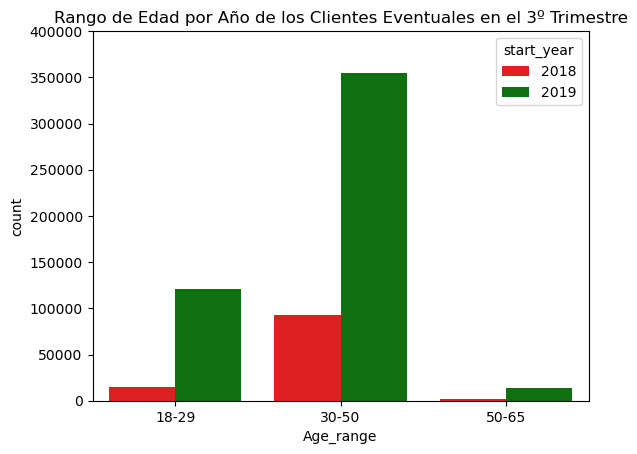

In [53]:
# Crear el gráfico de barras utilizando Seaborn
sns.barplot(x='Age_range', y='count', hue='start_year', data=rang_anoC3, palette=['red', 'green'])

# Configurar el título del gráfico
plt.title('Rango de Edad por Año de los Clientes Eventuales en el 3º Trimestre')

# Establecer límites del eje y del gráfico 
plt.ylim(0, 400000)

# Mostrar el gráfico
plt.show()

Trabajar con Tripduration

In [54]:
# Calcular la media de la columna 'tripduration' por rango de edad y año
tripC3 = Q3.groupby(['Age_range', 'start_year'])['tripduration'].mean().reset_index(name='mean_tripduration')
tripC3

,Age_range,start_year,mean_tripduration
0,18-29,2018,702.39
1,18-29,2019,1902.61
2,30-50,2018,723.26
3,30-50,2019,2408.23
4,50-65,2018,716.74
5,50-65,2019,2998.73


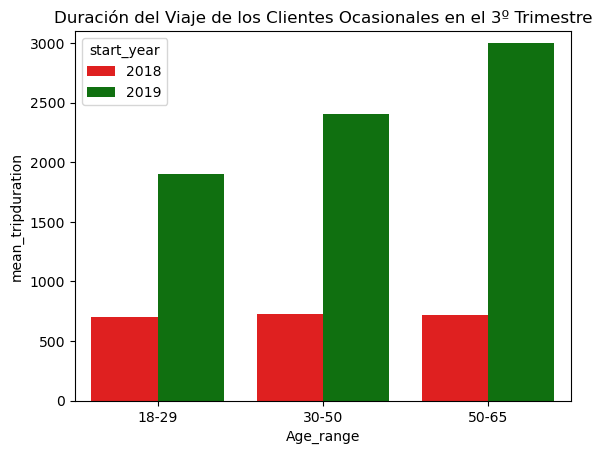

In [55]:
# Crear el gráfico de barras utilizando Seaborn
sns.barplot(x='Age_range', y='mean_tripduration', hue='start_year', data=tripC3, palette=['red', 'green'])

# Configurar el título del gráfico
plt.title('Duración del Viaje de los Clientes Ocasionales en el 3º Trimestre')

# Establecer límites del eje y del gráfico 
plt.ylim(0, 3100)

# Mostrar el gráfico
plt.show()

Trabajar con gender

In [56]:
# Calcular la suma de cada rango de edad
gend_anoc3 = Q3.groupby(['gender','start_year']).size().reset_index(name='count')
gend_anoc3

,gender,start_year,count
0,Female,2018,9740
1,Female,2019,82045
2,Male,2018,98739
3,Male,2019,406805


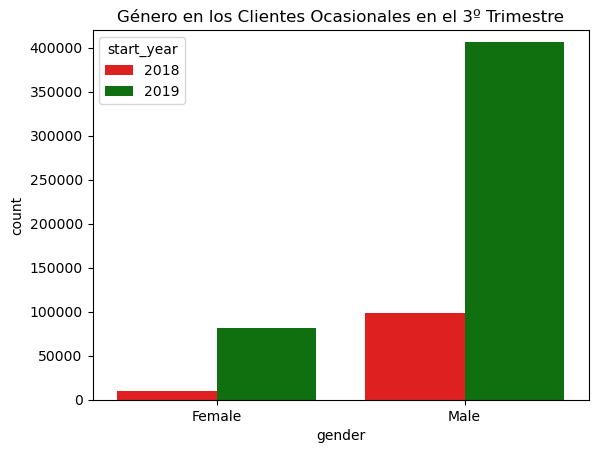

In [57]:
# Crear el gráfico de barras utilizando Seaborn
sns.barplot(x='gender', y='count', hue='start_year', data=gend_anoc3, palette=['red', 'green'] )

# Establecer el título del gráfico
plt.title('Género en los Clientes Ocasionales en el 3º Trimestre')
# Establecer límites del eje y del gráfico 
plt.ylim(0, 420000)

# Mostrar el gráfico
plt.show()

DIA DE INICIO POR AÑO Y MES

In [58]:
# Calcular la media de la columna 'Edad' agrupada por 'Start Year'
moda_por_dayC3 = Q3.groupby(['start_year','start_month'])['start_day'].apply(lambda x: x.mode()).reset_index(name='dia_frecuente')
moda_por_dayC3 = moda_por_dayC3.drop(columns='level_2')
moda_por_dayC3

,start_year,start_month,dia_frecuente
0,2018,7,28
1,2018,8,4
2,2018,9,2
3,2019,7,27
4,2019,8,3
5,2019,9,1


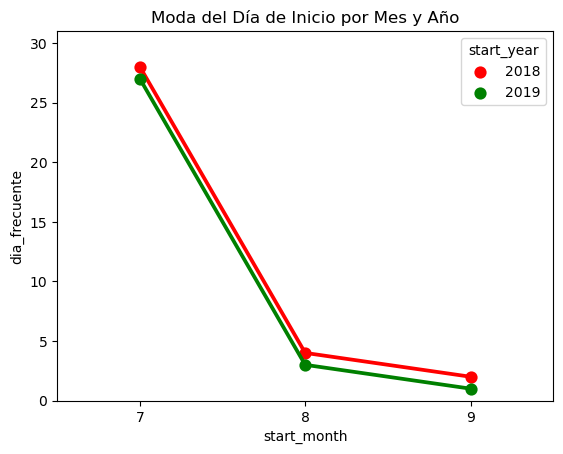

In [59]:
# Crear el gráfico de barras utilizando Seaborn
sns.pointplot(x='start_month', y='dia_frecuente', hue='start_year', data=moda_por_dayC3, palette=['red', 'green'] )

# Configurar el título del gráfico
plt.title('Moda del Día de Inicio por Mes y Año')

# Establecer el rango del eje y desde 0 hasta 30
plt.ylim(0, 31)

# Mostrar el gráfico
plt.show()

ESTACIONES MEJORES DE INICIO

In [60]:
# Contar las repeticiones de valores en la columna 'from_station_name', para saber las mejores estaciones
mejores_estaciones3C = Q3['from_station_name'].value_counts().head(5)
mejores_estaciones3C

Streeter Dr & Grand Ave       36549
Lake Shore Dr & Monroe St     23151
Lake Shore Dr & North Blvd    15218
Michigan Ave & Oak St         14672
Millennium Park               14562
Name: from_station_name, dtype: int64

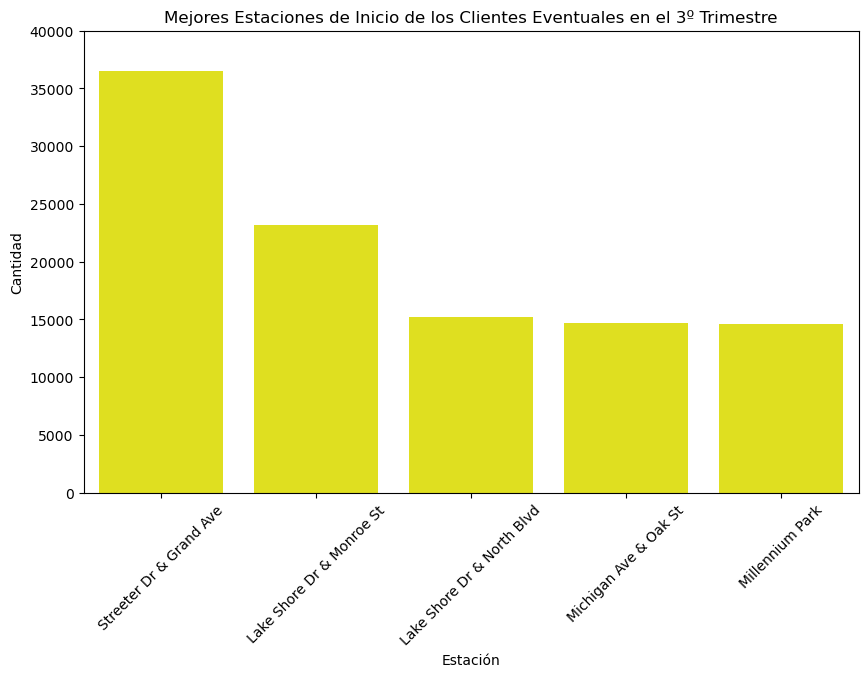

In [61]:
# Crear el gráfico de barras
plt.figure(figsize=(10, 6))
sns.barplot(x=mejores_estaciones3C.index, y=mejores_estaciones3C.values, color='yellow')
plt.xlabel('Estación')
plt.ylabel('Cantidad')
plt.title('Mejores Estaciones de Inicio de los Clientes Eventuales en el 3º Trimestre')
# Establecer límites del eje y del gráfico 
plt.ylim(0, 40000)
plt.xticks(rotation=45)

# Mostrar el gráfico
plt.show()

In [62]:
# Contar las repeticiones de valores en la columna 'to_station_name', para saber las mejores estaciones
mejores_estaciones_finalc3 = Q1['to_station_name'].value_counts().head(5)
mejores_estaciones_finalc3

Streeter Dr & Grand Ave      4121
Millennium Park              1875
Lake Shore Dr & Monroe St    1833
Shedd Aquarium               1526
Michigan Ave & Oak St         937
Name: to_station_name, dtype: int64

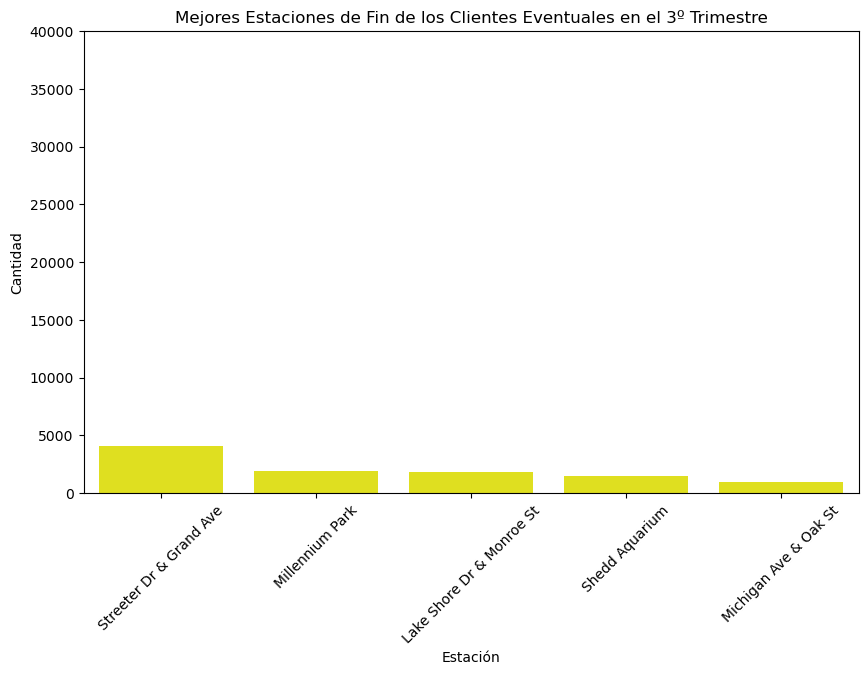

In [63]:
# Crear el gráfico de barras
plt.figure(figsize=(10, 6))
sns.barplot(x=mejores_estaciones_finalc3.index, y=mejores_estaciones_finalc3.values, color='yellow')
plt.xlabel('Estación')
plt.ylabel('Cantidad')
plt.title('Mejores Estaciones de Fin de los Clientes Eventuales en el 3º Trimestre')
# Establecer límites del eje y del gráfico 
plt.ylim(0, 40000)
plt.xticks(rotation=45)

# Mostrar el gráfico
plt.show()

RELACIONAR ESTACION DE INICIO Y FINAL.

In [64]:
# Encontrar los viajes que coinciden en inicio y fin de recorrido
viajes_coincidentes3 = Q3[Q3['from_station_name'] == Q3['to_station_name']]
viajes_coincidentes3

,tripduration,from_station_name,to_station_name,usertype,gender,start_day,start_month,start_year,Age_range
13,540.00,Streeter Dr & Grand Ave,Streeter Dr & Grand Ave,Customer,Male,1,7,2018,30-50
14,524.00,Streeter Dr & Grand Ave,Streeter Dr & Grand Ave,Customer,Male,1,7,2018,30-50
20,1032.00,Clark St & Armitage Ave,Clark St & Armitage Ave,Customer,Male,1,7,2018,30-50
21,993.00,Clark St & Armitage Ave,Clark St & Armitage Ave,Customer,Male,1,7,2018,30-50
26,823.00,Clark St & Armitage Ave,Clark St & Armitage Ave,Customer,Male,1,7,2018,30-50
...,...,...,...,...,...,...,...,...,...
488804,2373.00,Lake Shore Dr & Ohio St,Lake Shore Dr & Ohio St,Customer,Male,30,9,2019,30-50
488806,63.00,Sheffield Ave & Fullerton Ave,Sheffield Ave & Fullerton Ave,Customer,Male,30,9,2019,18-29
488813,1484.00,Sheridan Rd & Loyola Ave,Sheridan Rd & Loyola Ave,Customer,Male,30,9,2019,30-50
488825,2477.00,Damen Ave & Thomas St (Augusta Blvd),Damen Ave & Thomas St (Augusta Blvd),Customer,Male,30,9,2019,30-50


In [65]:
# Calcular la suma de los recorridos coincidentes por estación
suma_recorridos3 = viajes_coincidentes3.shape[0]
suma_recorridos3

65898

In [66]:
#proporcion de viajes coincidentes
proporcion_viajes_iguales3 = suma_recorridos3 / len(Q3) * 100 
proporcion_viajes_iguales3

11.032111282057292

SABER CUANTOS DE ESTOS VIAJES QUE COINCIDEN SON DE LAS MEJORES ESTACIONES

In [67]:
#estaciones mejores
estaciones3=['Streeter Dr & Grand Ave','Lake Shore Dr & Monroe St','Shedd Aquarium','Millennium Park','Lake Shore Dr & North Blvd ']

In [68]:
# Filtrar los viajes coincidentes con las mejores estaciones
viajesft3 = Q3[Q3['from_station_name'].isin(estaciones3) & Q3['to_station_name'].isin(estaciones3) & (Q3['from_station_name'] == Q3['to_station_name'])]
viajesft3

,tripduration,from_station_name,to_station_name,usertype,gender,start_day,start_month,start_year,Age_range
13,540.00,Streeter Dr & Grand Ave,Streeter Dr & Grand Ave,Customer,Male,1,7,2018,30-50
14,524.00,Streeter Dr & Grand Ave,Streeter Dr & Grand Ave,Customer,Male,1,7,2018,30-50
210,438.00,Millennium Park,Millennium Park,Customer,Male,1,7,2018,30-50
211,443.00,Millennium Park,Millennium Park,Customer,Male,1,7,2018,30-50
592,318.00,Millennium Park,Millennium Park,Customer,Male,1,7,2018,30-50
...,...,...,...,...,...,...,...,...,...
488531,1984.00,Lake Shore Dr & Monroe St,Lake Shore Dr & Monroe St,Customer,Male,30,9,2019,30-50
488535,1837.00,Lake Shore Dr & Monroe St,Lake Shore Dr & Monroe St,Customer,Male,30,9,2019,30-50
488582,4821.00,Lake Shore Dr & Monroe St,Lake Shore Dr & Monroe St,Customer,Male,30,9,2019,30-50
488603,2046.00,Lake Shore Dr & Monroe St,Lake Shore Dr & Monroe St,Customer,Male,30,9,2019,30-50


In [69]:
sum_viajesft3 = viajesft3['from_station_name'].value_counts().sum()
sum_viajesft3

13332

In [70]:
# Calcular el porcentaje de viajes coincidentes con las mejores estaciones
porcentaje_coincidentes3 = (sum_viajesft3 / suma_recorridos3) * 100
porcentaje_coincidentes3

20.231266502777018

# 4º TRIMESTRE 2018 y 2019

In [71]:
# Cargar los dataset dataset
Q42018 = pd.read_csv('CUSQ418CLEAN.csv')
Q42019 = pd.read_csv('CUSQ419CLEAN.csv')
# Fusionar los datasets por columnas comunes
Q4 = pd.concat([Q42018, Q42019])

In [72]:
Q4.head()

,tripduration,from_station_name,to_station_name,usertype,gender,start_day,start_month,start_year,Age_range
0,682.00,Rush St & Hubbard St,Wells St & Polk St,Customer,Male,1,10,2018,30-50
1,1002.00,State St & Kinzie St,Clark St & Elm St,Customer,Male,1,10,2018,30-50
2,1072.00,Blackstone Ave & Hyde Park Blvd,Blackstone Ave & Hyde Park Blvd,Customer,Male,1,10,2018,18-29
3,2074.00,Orleans St & Chestnut St (NEXT Apts),Albany Ave & Bloomingdale Ave,Customer,Male,1,10,2018,30-50
4,534.00,LaSalle St & Washington St,Wabash Ave & 9th St,Customer,Male,1,10,2018,18-29


In [73]:
Q4.shape

(164943, 9)

In [74]:
# Desactivar la notación científica
pd.set_option('display.float_format', '{:.2f}'.format)
Q4.describe()

,tripduration,start_day,start_month,start_year
count,164943.00,164943.00,164943.00,164943.00
mean,1819.25,14.12,10.46,2018.64
std,1742.72,8.47,0.73,0.48
min,61.00,1.00,10.00,2018.00
25%,746.00,7.00,10.00,2018.00
50%,1311.00,13.00,10.00,2019.00
75%,2163.00,21.00,11.00,2019.00
max,18453.00,31.00,12.00,2019.00


Trabajo con la edad

In [75]:
# Calcular la suma de cada rango de edad
rang_anoC4 = Q4.groupby(['Age_range','start_year']).size().reset_index(name='count')
rang_anoC4

,Age_range,start_year,count
0,18-29,2018,7696
1,18-29,2019,24882
2,30-50,2018,51207
3,30-50,2019,77574
4,50-65,2018,1133
5,50-65,2019,2451


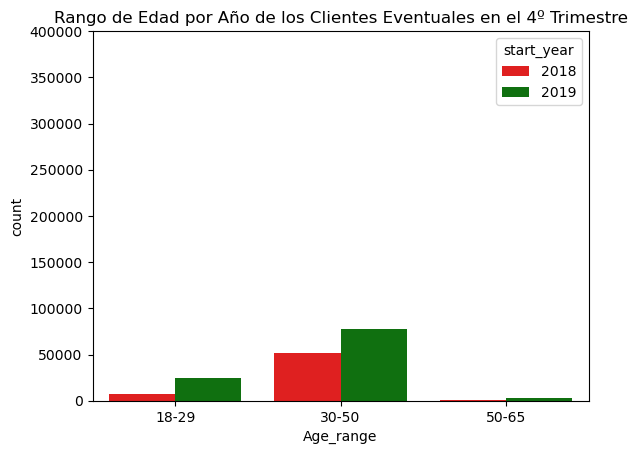

In [76]:
# Crear el gráfico de barras utilizando Seaborn
sns.barplot(x='Age_range', y='count', hue='start_year', data=rang_anoC4, palette=['red', 'green'])

# Configurar el título del gráfico
plt.title('Rango de Edad por Año de los Clientes Eventuales en el 4º Trimestre')

# Establecer límites del eje y del gráfico 
plt.ylim(0, 400000)

# Mostrar el gráfico
plt.show()

Trabajar con Tripduration

In [77]:
# Calcular la media de la columna 'tripduration' por rango de edad y año
tripC4 = Q4.groupby(['Age_range', 'start_year'])['tripduration'].mean().reset_index(name='mean_tripduration')
tripC4

,Age_range,start_year,mean_tripduration
0,18-29,2018,1490.40
1,18-29,2019,1469.16
2,30-50,2018,1840.08
3,30-50,2019,1929.50
4,50-65,2018,2155.89
5,50-65,2019,2325.91


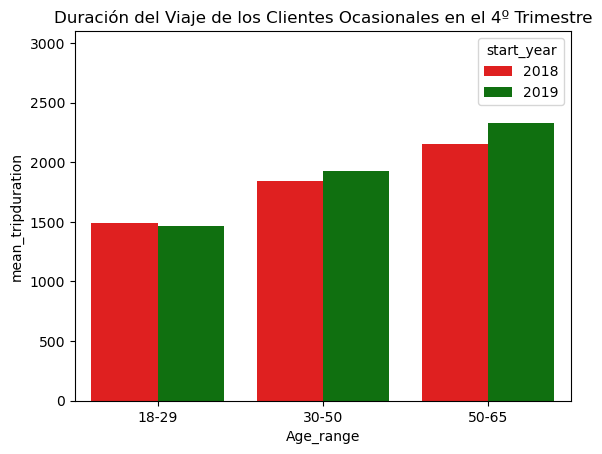

In [78]:
# Crear el gráfico de barras utilizando Seaborn
sns.barplot(x='Age_range', y='mean_tripduration', hue='start_year', data=tripC4, palette=['red', 'green'])

# Configurar el título del gráfico
plt.title('Duración del Viaje de los Clientes Ocasionales en el 4º Trimestre')

# Establecer límites del eje y del gráfico 
plt.ylim(0, 3100)

# Mostrar el gráfico
plt.show()

Trabajar con gender

In [79]:
# Calcular la suma de cada rango de edad
gend_anoc4 = Q4.groupby(['gender','start_year']).size().reset_index(name='count')
gend_anoc4

,gender,start_year,count
0,Female,2018,5167
1,Female,2019,13509
2,Male,2018,54869
3,Male,2019,91398


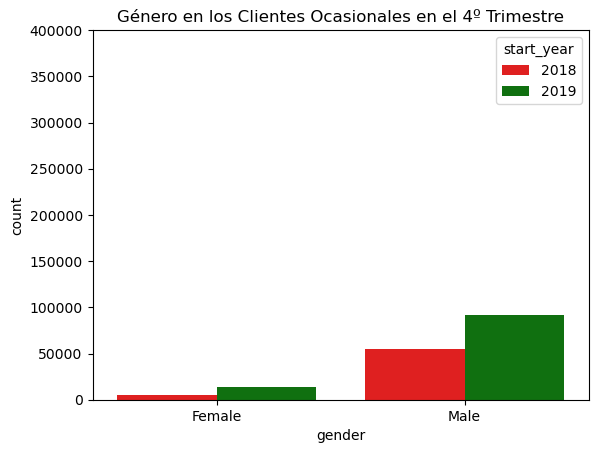

In [80]:
# Crear el gráfico de barras utilizando Seaborn
sns.barplot(x='gender', y='count', hue='start_year', data=gend_anoc4, palette=['red', 'green'] )

# Establecer el título del gráfico
plt.title('Género en los Clientes Ocasionales en el 4º Trimestre')
# Establecer límites del eje y del gráfico 
plt.ylim(0, 400000)

# Mostrar el gráfico
plt.show()

DIA DE INICIO POR AÑO Y MES

In [81]:
# Calcular la media de la columna 'Edad' agrupada por 'Start Year'
moda_por_dayC4 = Q4.groupby(['start_year','start_month'])['start_day'].apply(lambda x: x.mode()).reset_index(name='dia_frecuente')
moda_por_dayC4 = moda_por_dayC4.drop(columns='level_2')
moda_por_dayC4

,start_year,start_month,dia_frecuente
0,2018,10,8
1,2018,11,3
2,2018,12,16
3,2019,10,19
4,2019,11,3
5,2019,12,26


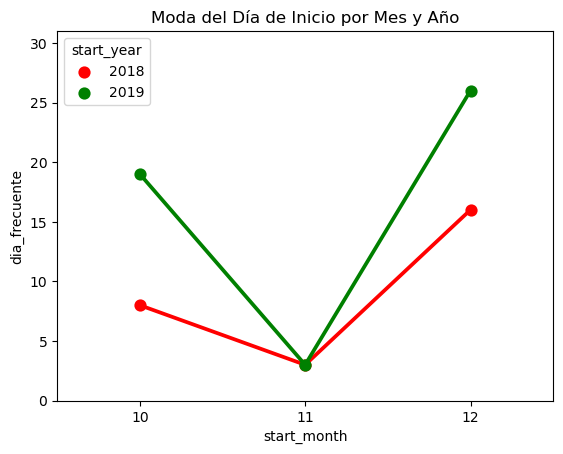

In [82]:
# Crear el gráfico de barras utilizando Seaborn
sns.pointplot(x='start_month', y='dia_frecuente', hue='start_year', data=moda_por_dayC4, palette=['red', 'green'] )

# Configurar el título del gráfico
plt.title('Moda del Día de Inicio por Mes y Año')

# Establecer el rango del eje y desde 0 hasta 30
plt.ylim(0, 31)

# Mostrar el gráfico
plt.show()

ESTACIONES MEJORES DE INICIO

In [83]:
# Contar las repeticiones de valores en la columna 'from_station_name', para saber las mejores estaciones
mejores_estacionesC4 = Q4['from_station_name'].value_counts().head(5)
mejores_estacionesC4

Streeter Dr & Grand Ave      8320
Lake Shore Dr & Monroe St    7691
Shedd Aquarium               4712
Millennium Park              4098
Michigan Ave & Oak St        2727
Name: from_station_name, dtype: int64

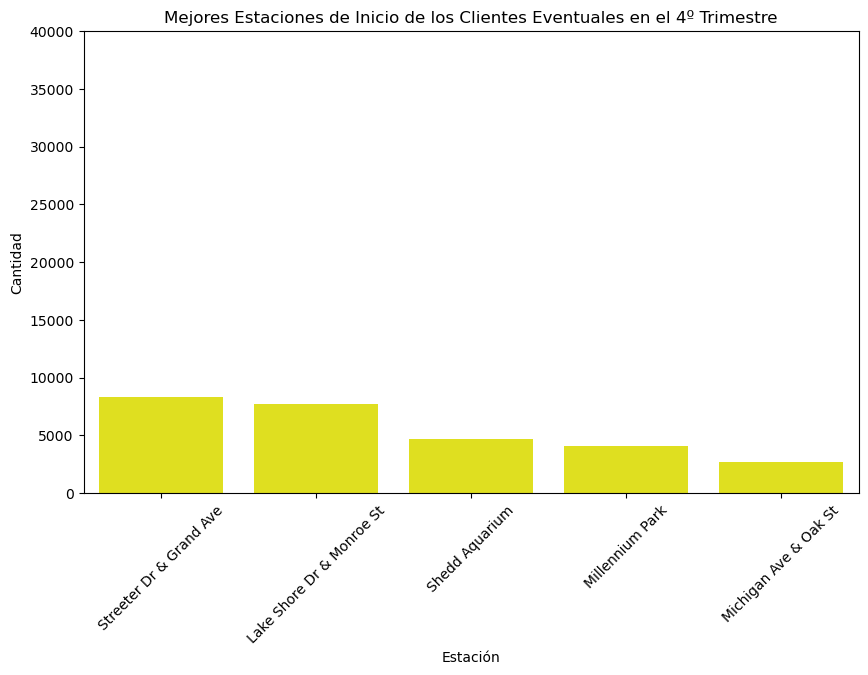

In [84]:
# Crear el gráfico de barras
plt.figure(figsize=(10, 6))
sns.barplot(x=mejores_estacionesC4.index, y=mejores_estacionesC4.values, color='yellow')
plt.xlabel('Estación')
plt.ylabel('Cantidad')
plt.title('Mejores Estaciones de Inicio de los Clientes Eventuales en el 4º Trimestre')
# Establecer límites del eje y del gráfico 
plt.ylim(0, 40000)
plt.xticks(rotation=45)

# Mostrar el gráfico
plt.show()

In [85]:
# Contar las repeticiones de valores en la columna 'to_station_name', para saber las mejores estaciones
mejores_estaciones_finalc4 = Q1['to_station_name'].value_counts().head(5)
mejores_estaciones_finalc4

Streeter Dr & Grand Ave      4121
Millennium Park              1875
Lake Shore Dr & Monroe St    1833
Shedd Aquarium               1526
Michigan Ave & Oak St         937
Name: to_station_name, dtype: int64

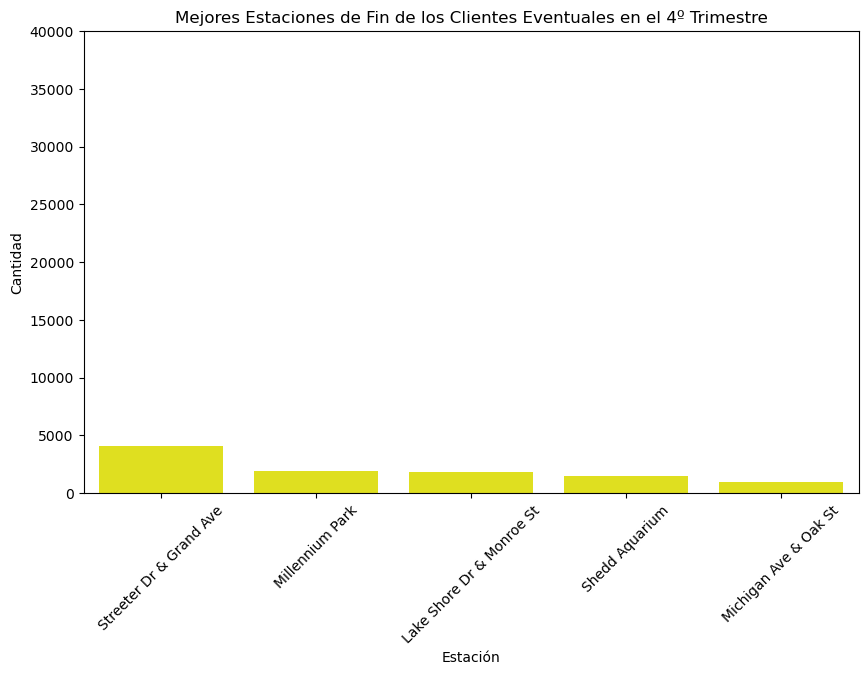

In [86]:
# Crear el gráfico de barras
plt.figure(figsize=(10, 6))
sns.barplot(x=mejores_estaciones_finalc4.index, y=mejores_estaciones_finalc4.values, color='yellow')
plt.xlabel('Estación')
plt.ylabel('Cantidad')
plt.title('Mejores Estaciones de Fin de los Clientes Eventuales en el 4º Trimestre')
# Establecer límites del eje y del gráfico 
plt.ylim(0, 40000)
plt.xticks(rotation=45)

# Mostrar el gráfico
plt.show()

RELACIONAR ESTACION DE INICIO Y FINAL.

In [87]:
# Encontrar los viajes que coinciden en inicio y fin de recorrido
viajes_coincidentes4 = Q4[Q4['from_station_name'] == Q4['to_station_name']]
viajes_coincidentes4

,tripduration,from_station_name,to_station_name,usertype,gender,start_day,start_month,start_year,Age_range
2,1072.00,Blackstone Ave & Hyde Park Blvd,Blackstone Ave & Hyde Park Blvd,Customer,Male,1,10,2018,18-29
5,404.00,Clark St & Congress Pkwy,Clark St & Congress Pkwy,Customer,Male,1,10,2018,30-50
65,1757.00,Ritchie Ct & Banks St,Ritchie Ct & Banks St,Customer,Male,1,10,2018,30-50
88,4445.00,Stetson Ave & South Water St,Stetson Ave & South Water St,Customer,Male,1,10,2018,30-50
100,1801.00,Southport Ave & Clybourn Ave,Southport Ave & Clybourn Ave,Customer,Male,1,10,2018,30-50
...,...,...,...,...,...,...,...,...,...
104818,318.00,Cityfront Plaza Dr & Pioneer Ct,Cityfront Plaza Dr & Pioneer Ct,Customer,Male,31,12,2019,30-50
104860,5008.00,Wilton Ave & Diversey Pkwy,Wilton Ave & Diversey Pkwy,Customer,Male,31,12,2019,30-50
104872,1102.00,Green St & Randolph St,Green St & Randolph St,Customer,Male,31,12,2019,30-50
104877,2174.00,Green St & Randolph St,Green St & Randolph St,Customer,Male,31,12,2019,30-50


In [88]:
# Calcular la suma de los recorridos coincidentes por estación
suma_recorridos4 = viajes_coincidentes4.shape[0]
suma_recorridos4

15410

In [89]:
#proporcion de viajes coincidentes
proporcion_viajes_iguales4 = suma_recorridos4 / len(Q4) * 100 
proporcion_viajes_iguales4

9.34262139041972

SABER CUANTOS DE ESTOS VIAJES QUE COINCIDEN SON DE LAS MEJORES ESTACIONES

In [90]:
#estaciones mejores
estaciones4=['Streeter Dr & Grand Ave','Lake Shore Dr & Monroe St','Shedd Aquarium','Millennium Park','Michigan Ave & Oak St']

In [91]:
# Filtrar los viajes coincidentes con las mejores estaciones
viajesft4 = Q4[Q4['from_station_name'].isin(estaciones4) & Q4['to_station_name'].isin(estaciones4) & (Q4['from_station_name'] == Q4['to_station_name'])]
viajesft4

,tripduration,from_station_name,to_station_name,usertype,gender,start_day,start_month,start_year,Age_range
123,2899.00,Millennium Park,Millennium Park,Customer,Female,1,10,2018,18-29
124,2884.00,Millennium Park,Millennium Park,Customer,Female,1,10,2018,18-29
236,1796.00,Shedd Aquarium,Shedd Aquarium,Customer,Male,1,10,2018,30-50
324,5205.00,Michigan Ave & Oak St,Michigan Ave & Oak St,Customer,Male,1,10,2018,30-50
330,2067.00,Lake Shore Dr & Monroe St,Lake Shore Dr & Monroe St,Customer,Male,1,10,2018,30-50
...,...,...,...,...,...,...,...,...,...
104674,542.00,Streeter Dr & Grand Ave,Streeter Dr & Grand Ave,Customer,Male,30,12,2019,30-50
104677,1521.00,Streeter Dr & Grand Ave,Streeter Dr & Grand Ave,Customer,Male,30,12,2019,30-50
104678,1510.00,Streeter Dr & Grand Ave,Streeter Dr & Grand Ave,Customer,Male,30,12,2019,30-50
104679,1697.00,Millennium Park,Millennium Park,Customer,Male,30,12,2019,30-50


In [92]:
sum_viajesft4 = viajesft4['from_station_name'].value_counts().sum()
sum_viajesft4

4038

In [93]:
# Calcular el porcentaje de viajes coincidentes con las mejores estaciones
porcentaje_coincidentes4 = (sum_viajesft4 / suma_recorridos4) * 100
porcentaje_coincidentes4

26.20376378974692

# CONCLUSIONES CLIENTES EVENTUALES

# COMPARATIVA ENTRE CLIENTES EVENTUALES Y SUSCRIPTORES EN EL 2ºTRIMESTRE

In [95]:
# Cargar los dataset dataset
QS22018 = pd.read_csv('SUSQ218CLEAN.csv')
QS22019 = pd.read_csv('SUSQ219CLEAN.csv')
# Fusionar los datasets por columnas comunes
QS2 = pd.concat([QS22018, QS22019, Q2])
QS2.head()

,tripduration,from_station_name,to_station_name,usertype,gender,start_day,start_month,start_year,Age_range
0,499.00,May St & Taylor St,May St & Cullerton St,Subscriber,Male,1,4,2018,18-29
1,1225.00,Lake Shore Dr & Wellington Ave,Southport Ave & Wrightwood Ave,Subscriber,Male,1,4,2018,50-65
2,434.00,Morgan St & Polk St,May St & Cullerton St,Subscriber,Male,1,4,2018,18-29
3,709.00,Damen Ave & Melrose Ave,Damen Ave & Cortland St,Subscriber,Male,1,4,2018,30-50
4,659.00,Ravenswood Ave & Irving Park Rd,Clark St & Winnemac Ave (Temp),Subscriber,Male,1,4,2018,18-29


COMPARATIVA DE LA EDAD

In [106]:
# Calcular la suma de cada rango de edad
compedad = QS2.groupby(['Age_range','usertype']).size().reset_index(name='count')
compedad

,Age_range,usertype,count
0,18-29,Customer,42948
1,18-29,Subscriber,556402
2,30-50,Customer,300460
3,30-50,Subscriber,896601
4,50-65,Customer,3934
5,50-65,Subscriber,193261


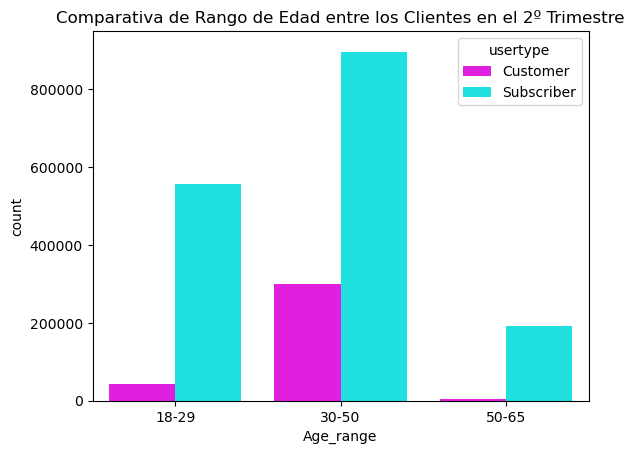

In [122]:
# Crear el gráfico de barras utilizando Seaborn
sns.barplot(x='Age_range', y='count', hue='usertype', data=compedad, palette=['magenta', 'cyan'])
# Configurar el título del gráfico
plt.title('Comparativa de Rango de Edad entre los Clientes en el 2º Trimestre')

# Establecer límites del eje y del gráfico 
plt.ylim(0, 950000)

# Mostrar el gráfico
plt.show()

COMPARATIVA DURACION DEL VIAJE

In [108]:
# Calcular la media de la columna 'tripduration' por rango de edad y año
comptrip = QS2.groupby(['Age_range', 'usertype'])['tripduration'].mean().reset_index(name='mean_tripduration')
comptrip

,Age_range,usertype,mean_tripduration
0,18-29,Customer,1230.33
1,18-29,Subscriber,738.71
2,30-50,Customer,1414.22
3,30-50,Subscriber,733.60
4,50-65,Customer,1337.37
5,50-65,Subscriber,709.71


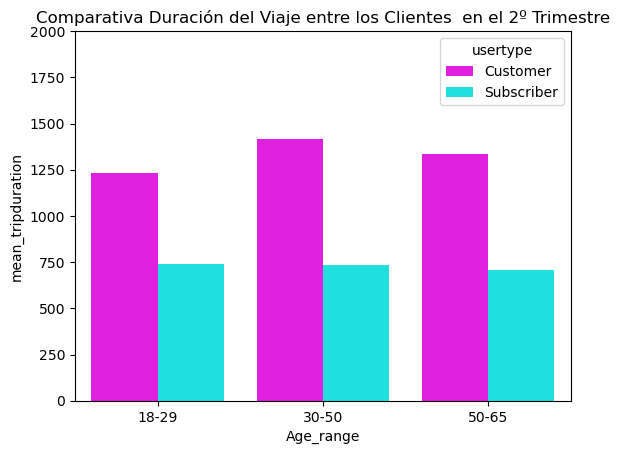

In [124]:
# Crear el gráfico de barras utilizando Seaborn
sns.barplot(x='Age_range', y='mean_tripduration', hue='usertype', data=comptrip, palette=['magenta', 'cyan'])

# Configurar el título del gráfico
plt.title('Comparativa Duración del Viaje entre los Clientes  en el 2º Trimestre')

# Establecer límites del eje y del gráfico 
plt.ylim(0, 2000)

# Mostrar el gráfico
plt.show()

COMPARATIVA DE GENERO

In [115]:
# Calcular la suma de cada rango de edad
compgen = QS2.groupby(['gender','usertype']).size().reset_index(name='count')
compgen

,gender,usertype,count
0,Female,Customer,30042
1,Female,Subscriber,411909
2,Male,Customer,317300
3,Male,Subscriber,1234355


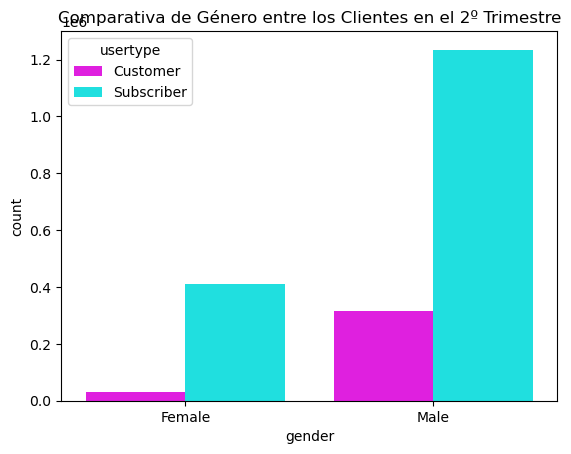

In [123]:
# Crear el gráfico de barras utilizando Seaborn
sns.barplot(x='gender', y='count', hue='usertype', data=compgen, palette=['magenta', 'cyan'] )

# Establecer el título del gráfico
plt.title('Comparativa de Género entre los Clientes en el 2º Trimestre')
# Establecer límites del eje y del gráfico 
plt.ylim(0, 1300000)

# Mostrar el gráfico
plt.show()

# CONCLUSIONES COMPARATIVA DE CLIENTES